In [16]:
# import custom boys and girls club package for simulating a dosing profile
from MultipleDoseClass import BGC_MultipleDosing

"""
BGC_MultipleDosing requires creating a 'compound' properties dictionary.
Required parameters:
    ka:      'rate' of absorption after swallowing (higher value means compound shows faster)
    kel:     'rate' of elimination after being absorbed (higher value means faster elimination)
    Vd:      'volume' This is simply a scaling factor to turn your dose 'amount' into a 'concentration'.
              In reality, this value represents how well the compound distributes in the body: Lower values means more
              of the compound stays in the blood, rather than getting into tissues and organs.
    F:       'Bioavalability' means how much of the dose makes it out of the 'gut' and can be helpful as medicine.
             Keep this as F=1 for your simulations.
    min_eff: 'minimum efficacy' concentration represents the lowest 'concentration' you need to get your desired effect
             (this would be experimentally determined)
    max_eff: 'maximum efficacy' concentration represents the highest 'concentration' you would want before the compound
              starts to have too many negative side effects.
             (this would also be experimentally determined)

For our initial experiments, we will consider a compound with the following values that we determined with the rest of
our science team:
    Compound BGC_25_2020 Pharmacokinetic Properties:
        ka = 0.2, kel = 0.1, Vd = 35, F = 1, min_eff=0.4, max_eff=0.6
    Compound BGC_25_2020 Available Dose amounts:
        5, 10, 15, 20, 30

At the end of these initial experiments we will select the best dosing combination from visual outputs assuming our
options would be 1, 2, or 3 possible doses per day for patients to take (have you ever had to take medicine more than
 3x/day?).

"""

"\nBGC_MultipleDosing requires creating a 'compound' properties dictionary.\nRequired parameters:\n    ka:      'rate' of absorption after swallowing (higher value means compound shows faster)\n    kel:     'rate' of elimination after being absorbed (higher value means faster elimination)\n    Vd:      'volume' This is simply a scaling factor to turn your dose 'amount' into a 'concentration'.\n              In reality, this value represents how well the compound distributes in the body: Lower values means more\n              of the compound stays in the blood, rather than getting into tissues and organs.\n    F:       'Bioavalability' means how much of the dose makes it out of the 'gut' and can be helpful as medicine.\n             Keep this as F=1 for your simulations.\n    min_eff: 'minimum efficacy' concentration represents the lowest 'concentration' you need to get your desired effect\n             (this would be experimentally determined)\n    max_eff: 'maximum efficacy' concentra

Let's set up our Boys and Girls Club 'compound' with the properties from above in python

In [17]:
BGC_25_2020 = dict(ka = 0.2, kel = 0.1, Vd = 35, F = 1, min_eff=0.4, max_eff=0.6)
sim_times = dict(min=0, max=24*3, interval=1/60) # every minute - why not, we are simulating!!

Now Let's set up our 1x, 2x, and 3x dosing scenarios for available 'strengths' of compound and see whis best

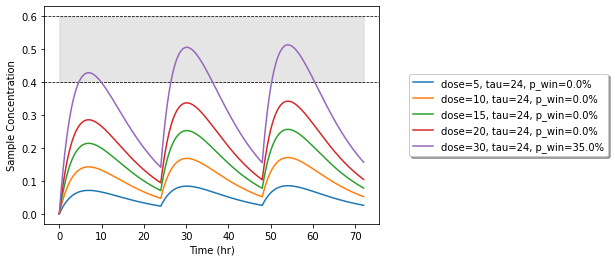

In [18]:
# once per day
D1 = BGC_MultipleDosing(properties=BGC_25_2020)
D1.set_observation_times(min=sim_times['min'], max=sim_times['max'], interval=sim_times['interval'])
D1.simulate_profile(dose=5, tau=24)
D1.add_profile(dose=10, tau=24)
D1.add_profile(dose=15, tau=24)
D1.add_profile(dose=20, tau=24)
D1.add_profile(dose=30, tau=24)
D1.plot_class_profiles()

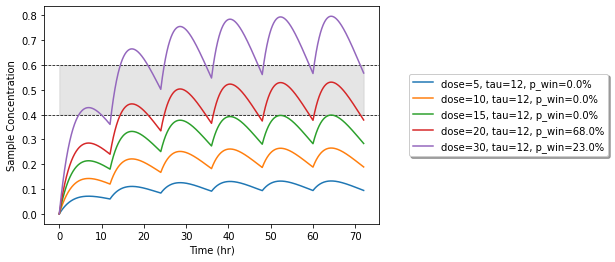

In [19]:
# 2x per day
D2 = BGC_MultipleDosing(properties=BGC_25_2020)

D2.set_observation_times(min=sim_times['min'], max=sim_times['max'], interval=sim_times['interval'])
D2.simulate_profile(dose=5, tau=12)
D2.add_profile(dose=10, tau=12)
D2.add_profile(dose=15, tau=12)
D2.add_profile(dose=20, tau=12)
D2.add_profile(dose=30, tau=12)
D2.plot_class_profiles()

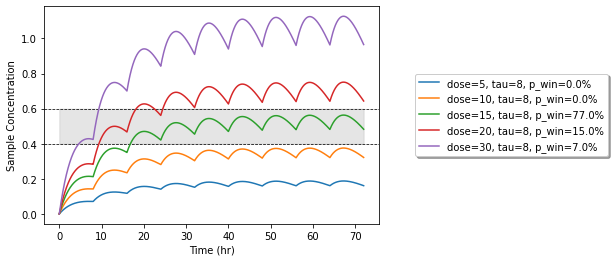

In [20]:
# 3x per day
D3 = BGC_MultipleDosing(properties=BGC_25_2020)
D3.set_observation_times(min=sim_times['min'], max=sim_times['max'], interval=sim_times['interval'])
D3.simulate_profile(dose=5, tau=8)
D3.add_profile(dose=10, tau=8)
D3.add_profile(dose=15, tau=8)
D3.add_profile(dose=20, tau=8)
D3.add_profile(dose=30, tau=8)
D3.plot_class_profiles()


What would our decision be as to how much medicine should be taken how often in order to make sure the 'average'
patient spends the most time within our desired window of effect?
